## Importing Main Libraries

In [1]:
## neaded libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import os, joblib, missingno

# Load Dataset and Learn about it

In [2]:
## read the dataset using pandas
FILE_Path = os.path.join(os.getcwd(),'housing.csv')
dataFrame_housing = pd.read_csv(FILE_Path)
## head of the dataset 
dataFrame_housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
## info about the dataset
dataFrame_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
## some statistics about the Dataset
dataFrame_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
## Check nulls 
dataFrame_housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

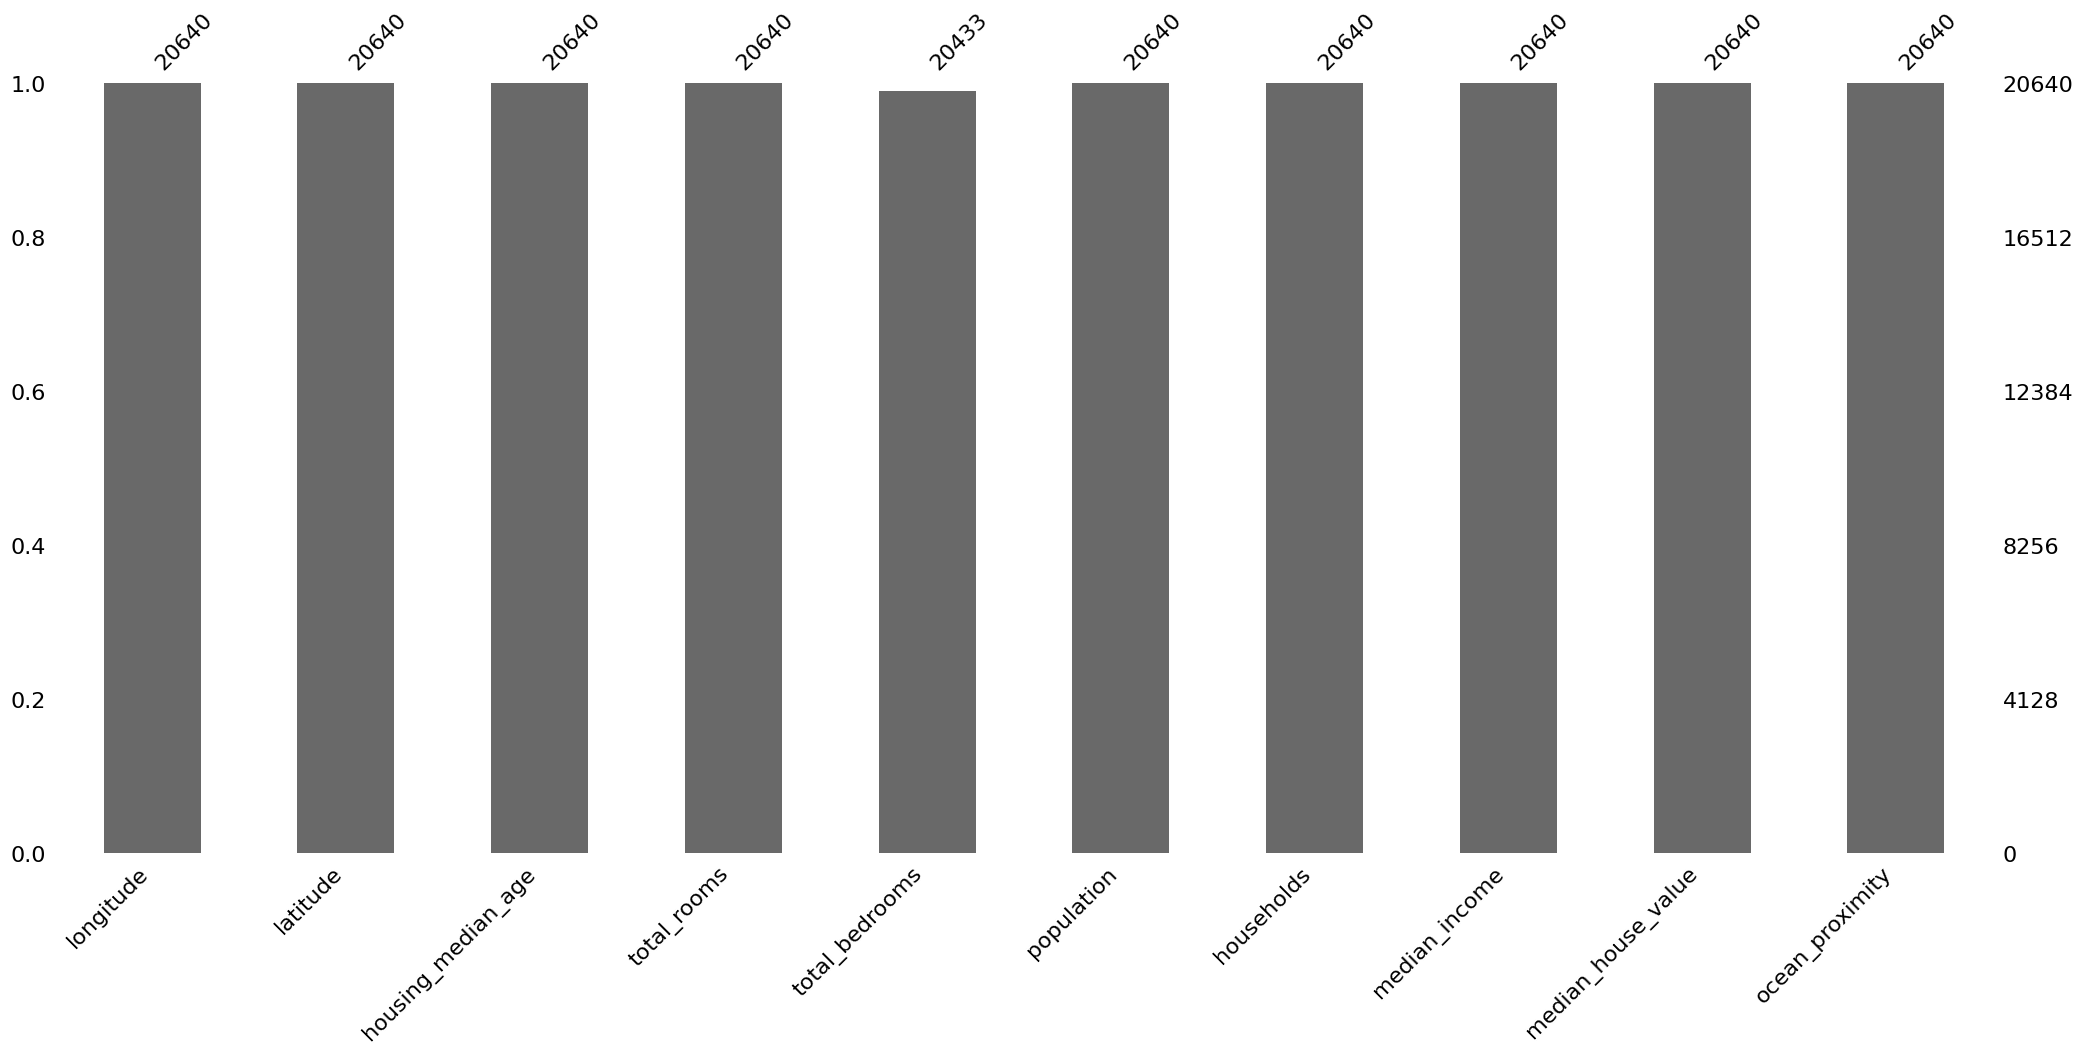

In [6]:
## check nulls using missingno library -- nulls at ( total_bedrooms)
missingno.bar(dataFrame_housing)

<Axes: >

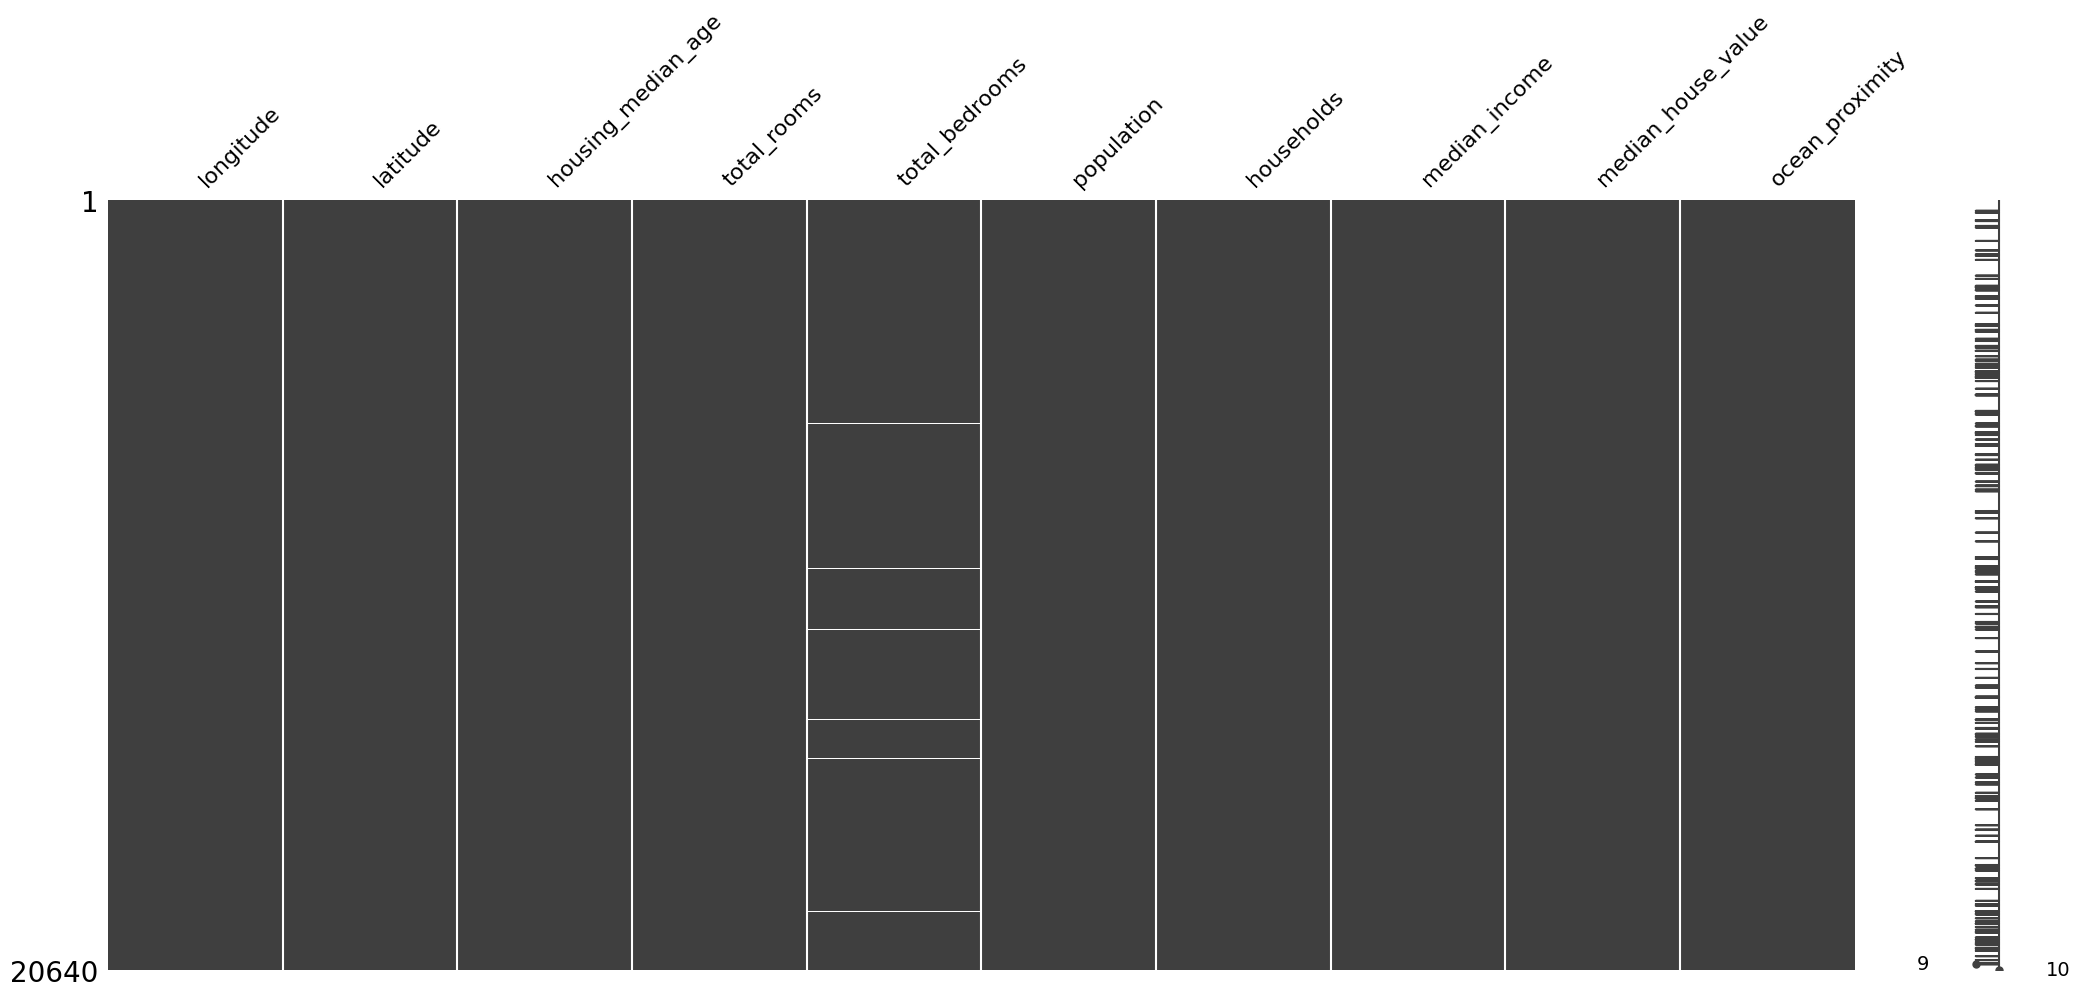

In [7]:
## learning specific 207 nulls in total_bedrooms -- using missingno library   
missingno.matrix(dataFrame_housing)

<div class="alert alert-block alert-success">
    <b>Comment: information we have known about about the housing dataset from previous code is that we have 207 nulls in total_bedrooms and all the data types of features is (float64) except 'ocean_proximity' is an categorial feature (object).   </b>
</div>

## Univariate Visualisation

In [44]:
## Analyze ocean_proximity feature
ocean_values = dataFrame_housing['ocean_proximity'].unique()
repetition = dataFrame_housing['ocean_proximity'].value_counts()
repetition.index

Index(['1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object', name='ocean_proximity')

C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


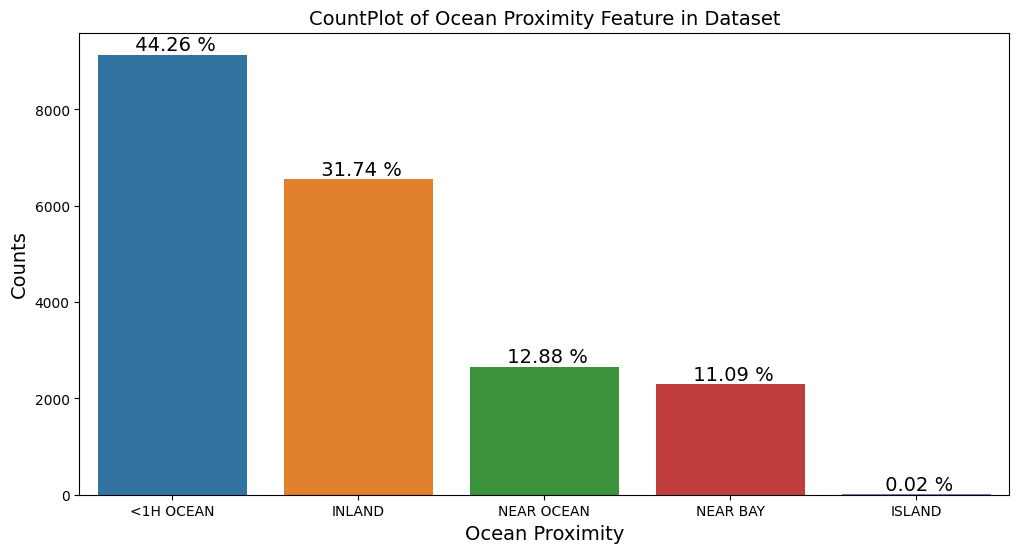

In [9]:
## Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='ocean_proximity', data=dataFrame_housing, order=repetition.index)
plt.title('CountPlot of Ocean Proximity Feature in Dataset', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')


## Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
dataFrame_housing['ocean_proximity'] = dataFrame_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')


## Display The Percentage over each bar
for i in range(len(repetition)):
    unique_value = repetition.values[i]
    percantage = f'{(unique_value/len(dataFrame_housing))*100 : .2f} %'
    plt.text(x=i,y=unique_value+80,s=percantage,ha = 'center',fontsize = 14)



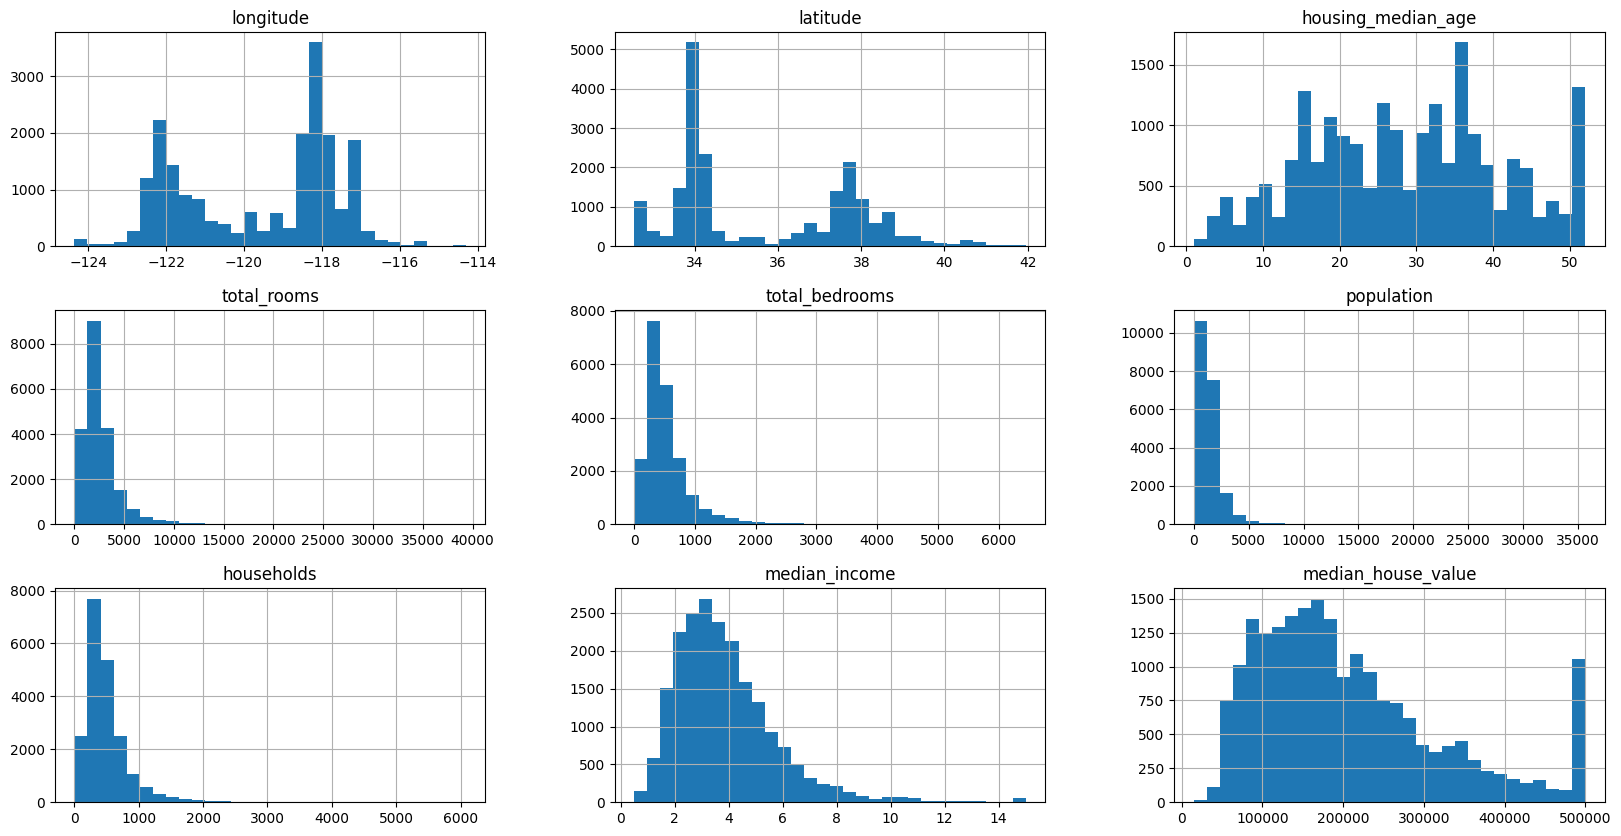

In [10]:
## Histogram Distr. of Numerical Features in Dataset
dataFrame_housing.hist(bins=30, figsize=(20, 10))
plt.show()

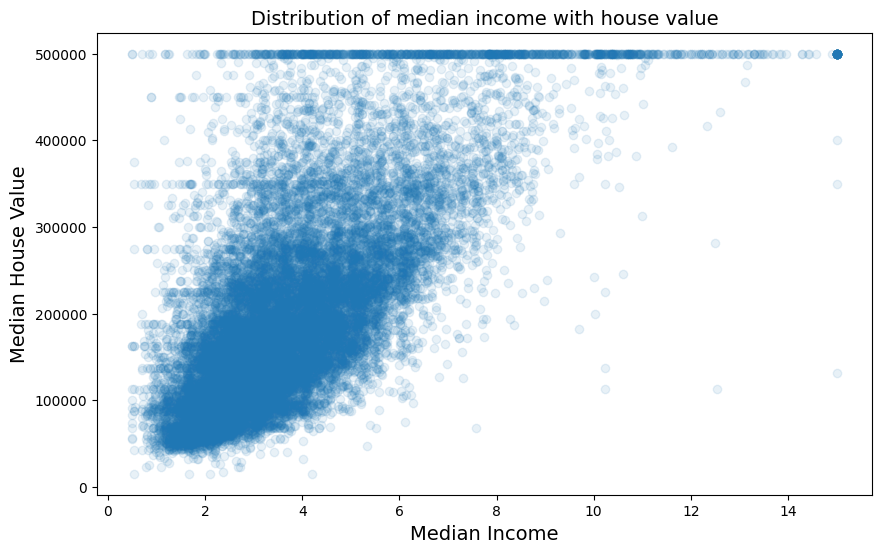

In [11]:
## Scatterplot with important Feature (median_income) with the target (median_house_value)
plt.figure(figsize=(10, 6))
plt.scatter(dataFrame_housing['median_income'], dataFrame_housing['median_house_value'], alpha=0.1)
plt.title('Distribution of median income with house value', fontsize=14, c='k')
plt.xlabel('Median Income', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

In [12]:
## Knowing the range of median_house_value
dataFrame_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


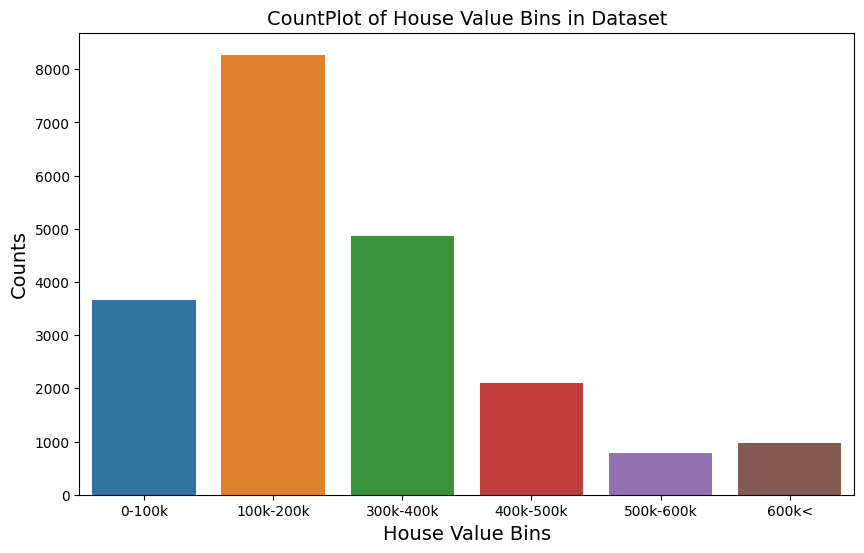

In [13]:
## Cutting median_house_value into chunks to convert it into categorial
house_value_bins = pd.cut(x=dataFrame_housing['median_house_value'], 
                          bins=[-np.inf, 100000, 200000, 300000, 400000, 500000, np.inf],
                          labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])

## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

In [14]:
## Knowing the range of median_house_value
dataFrame_housing['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


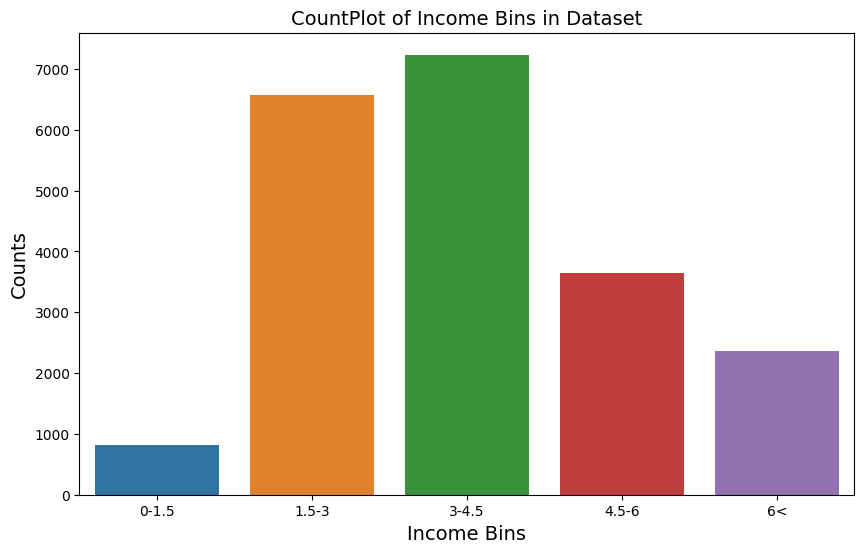

In [15]:
## Let's try the same above code for (median_income), I think it is very important Feature
income_bins = pd.cut(x=dataFrame_housing['median_income'], 
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


## Countplot for the above chunks
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show() 

<div class="alert alert-block alert-success">
    <b>Comment: It seems that the 1H ocean) is about the half of the dataset the data is biased to this category, someone can think to split the data according to this column using (startified) method if we found that this column is very important, we will discuss that later, Also, it seems that the Distribution of most of features are right skewed (exponential distribution) and it is known that the best distribution to be passed to the model is Normal Distribution, we will go further with these features to know how to deal with these skewed distrbution later, Also the majority of house_value is between (100k-200k), Also the majority of median_income is between (3-4.5), someone can change his mind and split the dataset using (startified) method according to the most important feature as I think till now which is (median_income) but use (income_bins) as the stratified method requires categorical features not numerical.  </b>
</div>

## Bivariate Visualisation

C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

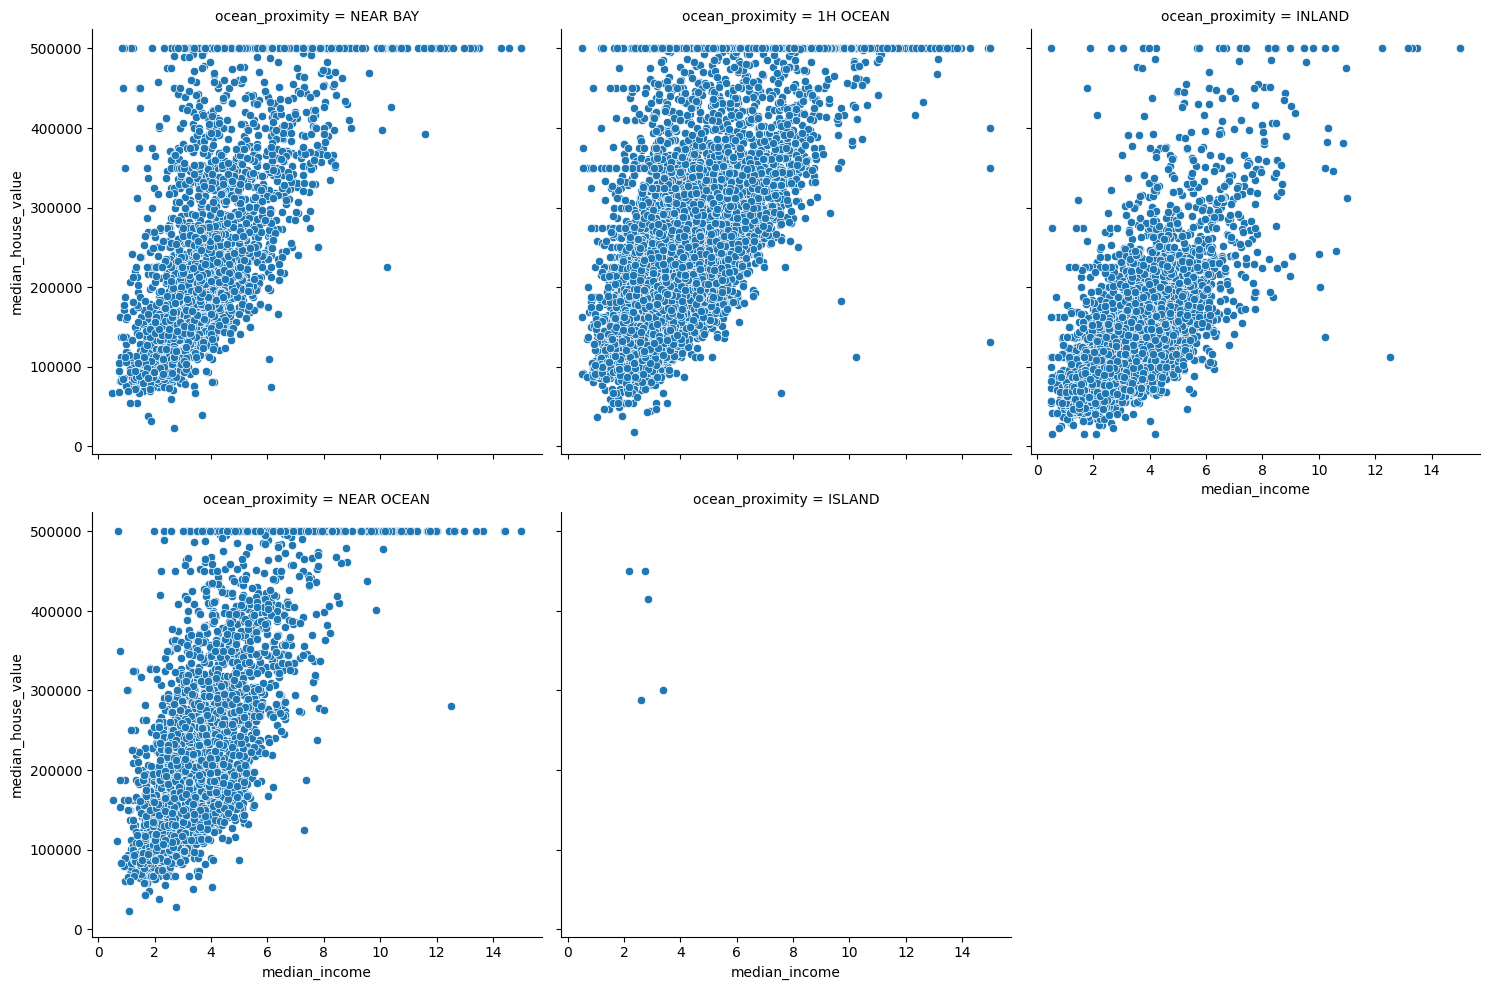

In [16]:
## at first, we will make scatter plot between (median_house_value) and (median_income) at each (ocean proximity)
sns.relplot(x = 'median_income',y='median_house_value', col = 'ocean_proximity',data = dataFrame_housing , col_wrap = 3 )

C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

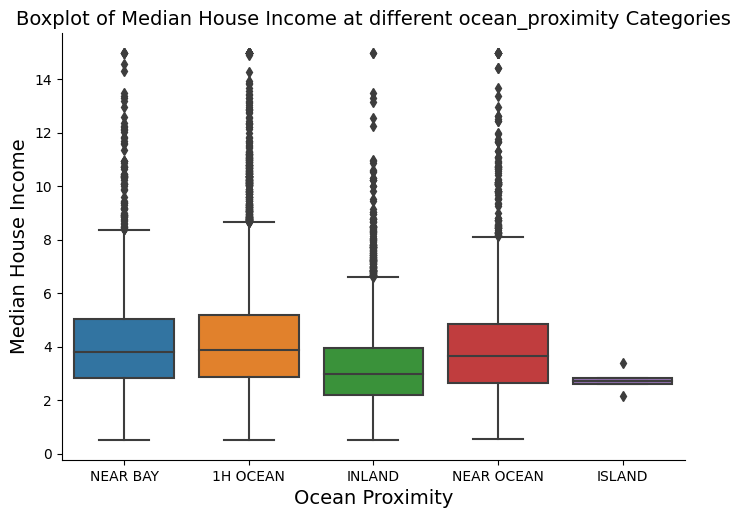

In [17]:
## now we will check the boxplot between (median_income) and (ocean_proximity)
sns.catplot(x='ocean_proximity',y='median_income',data = dataFrame_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Income at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Income', fontsize=14, c='k')
plt.show()

C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\zeyad\anaconda3\envs\RegPro\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

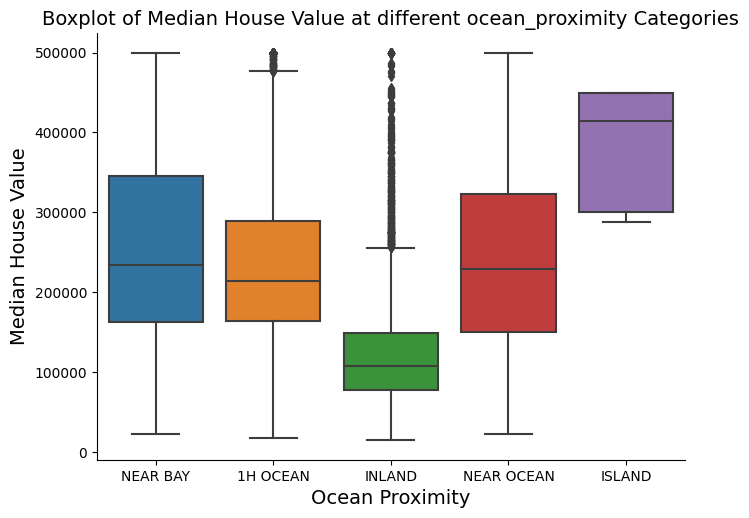

In [18]:
sns.catplot(x='ocean_proximity',y='median_house_value',data = dataFrame_housing, kind='box', height=5, aspect=1.4)
plt.title('Boxplot of Median House Value at different ocean_proximity Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

<div class="alert alert-block alert-success">
<b>    
Comment: It seems that the Distribution of median_income is almost the same at ocean_proximity categories, and median house value has more variations. Also, it seems that the INLAND median_income and median_house value is less than other categories and it makes sense </b>
</div>

## Multivariant Visulaization

In [19]:
dataFrame_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


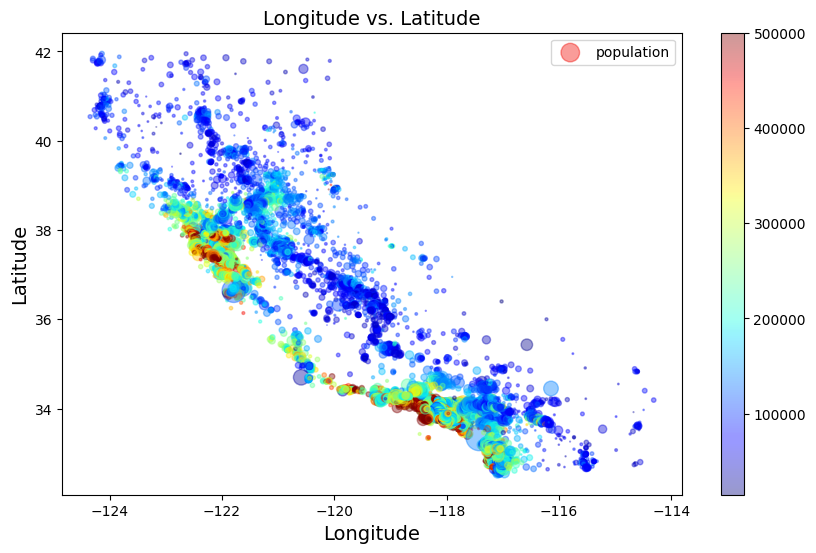

In [20]:
## scatter plotting of longitude vs. latitude with respect of (population) and (median_house_value).
plt.figure(figsize=(10,6))
scatt = plt.scatter(x='longitude',y='latitude',s=dataFrame_housing['population']/(100),c='median_house_value',data=dataFrame_housing,cmap=plt.get_cmap('jet'),
                    alpha=0.4,label='population')
plt.colorbar(scatt)
plt.legend()
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.show()

<div class="alert alert-block alert-success">
<b>    
Comment: what we can notice from that is houses closer than ocean is more expensive than others </b>
</div>

## Correlation between features and target

In [21]:
dataFrame_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
## getting correlation (pearson correlation)
## droping (ocean_proximity) before because its categorial feature not numerical
dataFrame_housing_corr = dataFrame_housing.drop(columns=['ocean_proximity'],axis = 1)
dataFrame_housing_corr.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

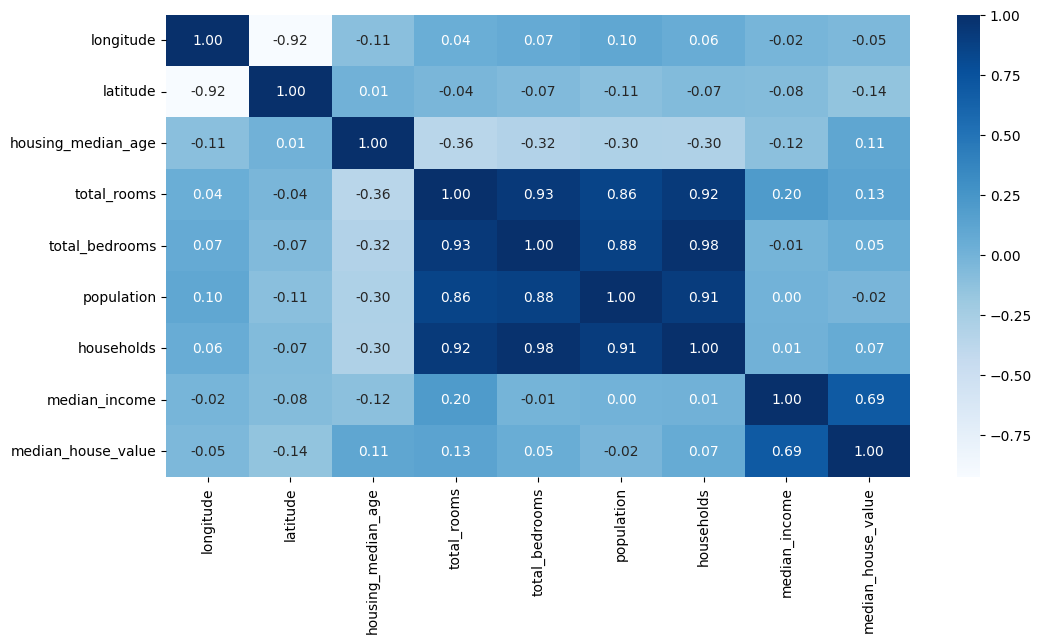

In [23]:
## heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(dataFrame_housing_corr.corr(),annot=True,cmap='Blues',fmt='.2f')
plt.show()

<div class="alert alert-block alert-success">
<b>    
Comment: we see the most important feature is (median_income) and households and population isn,t that important and that makes sense. </b>
</div>

## Feature Engineering

In [24]:
## Feature selection we would select all the fearures
## Feature Extraction we would extract more than feature to increace the corr important features
dataFrame_housing_corr['bedrooms_per_rooms']= dataFrame_housing_corr['total_bedrooms']/dataFrame_housing_corr['total_rooms']
dataFrame_housing_corr['population_per_household']= dataFrame_housing_corr['population']/dataFrame_housing_corr['households']
dataFrame_housing_corr['rooms_per_income']= dataFrame_housing_corr['total_rooms']/dataFrame_housing_corr['median_income']
dataFrame_housing_corr['rooms_per_household']= dataFrame_housing_corr['total_rooms']/dataFrame_housing_corr['households']

In [25]:
## we can figure thar three out of 4 added features are so good. 
dataFrame_housing_corr.corr()['median_house_value'].sort_values(ascending=False) 

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
rooms_per_income           -0.209103
bedrooms_per_rooms         -0.255880
Name: median_house_value, dtype: float64

<div class="alert alert-block alert-success">
<b>    
Comment: we can figure thar three out of 4 added features are so good. 
 </b>
</div

## Spliting the dataset into train and test set

In [26]:
## Add (ocean_proximity again to split the dataset)
dataFrame_housing_corr['ocean_proximity'] = dataFrame_housing['ocean_proximity']

In [27]:
X = dataFrame_housing_corr.drop(columns=['median_house_value'],axis = 1)
y = dataFrame_housing_corr['median_house_value']

In [28]:
## printing the shapes to make sure that shapes are correct (13 col as 9(10 - 1(median_house_value)) + 4 features we added)
print(X.shape)
print(y.shape)

(20640, 13)
(20640,)


In [29]:
## spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,shuffle = True)

In [30]:
## printing shapes of training and testing sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17544, 13)
(3096, 13)
(17544,)
(3096,)


## Dealing with Nulls

In [31]:
## separate numericat and category features of training set
numerical_cols = [col for col in X_train.columns if  X_train[col].dtype in ['int32','int64','float32','float64']]
category_cols = [col for col in X_train.columns if  X_train[col].dtype not in ['int32','int64','float32','float64']]
print(numerical_cols)
print(category_cols)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'bedrooms_per_rooms', 'population_per_household', 'rooms_per_income', 'rooms_per_household']
['ocean_proximity']


In [32]:
## imputing the nulls using median  (learning on training)
##(for viewing and testing we implement fitting and transforming i the same package (pipeline))
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
##just for trial we did it again above as a pipeline
imputer.fit(X_train[numerical_cols])


SimpleImputer(strategy='median')

In [33]:
## what's printed is the median for each colum that imputer learns by itself
imputer.statistics_

array([-1.18510000e+02,  3.42650000e+01,  2.90000000e+01,  2.13100000e+03,
        4.37000000e+02,  1.16800000e+03,  4.10500000e+02,  3.54090000e+00,
        2.02876796e-01,  2.81793691e+00,  6.18064069e+02,  5.23456397e+00])

In [34]:
## if we compare the values its the samee.
X_train[numerical_cols].median(axis=0)

longitude                   -118.510000
latitude                      34.265000
housing_median_age            29.000000
total_rooms                 2131.000000
total_bedrooms               437.000000
population                  1168.000000
households                   410.500000
median_income                  3.540900
bedrooms_per_rooms             0.202877
population_per_household       2.817937
rooms_per_income             618.064069
rooms_per_household            5.234564
dtype: float64

In [35]:
## transform learned into training and test set(fill nulls)
##just for trial we did it again below as a pipeline
X_train_filled = imputer.transform(X_train[numerical_cols])
X_test_filled = imputer.transform(X_test[numerical_cols])

In [36]:
## ensuring that null values are filled.(0 nulls)
pd.DataFrame(X_train_filled).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [37]:
## ensuring that null values are filled.(0 nulls)
pd.DataFrame(X_test_filled).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

## Scaling the Dataset

In [38]:
## scaling the dataset using StandardScaler Class
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

## We will use pipelining rather for imputing and standrization
## Pipeline - Numerical features


In [39]:
## pipeline for imputing and scaling at same package 
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
    ('imputer',imputer),
    ('scaler',scaler)
])
## fit and transform numerical features as pipeline
X_train_numerical = num_pipeline.fit_transform(X_train[numerical_cols])
X_test_numerical = num_pipeline.transform(X_test[numerical_cols])
X_train_numerical
X_test_numerical

array([[ 0.28503676,  0.1950594 , -0.28418942, ...,  0.07025375,
         0.20529837, -0.49063622],
       [ 0.06065351, -0.23550335,  0.1123855 , ..., -0.03635193,
         0.64040457, -0.1564243 ],
       [-1.42526222,  1.0093846 ,  1.85731512, ..., -0.15380112,
         0.53937491, -0.57547135],
       ...,
       [ 0.20026975, -0.67074613,  1.38142522, ...,  0.01397669,
        -0.16437786, -0.41000561],
       [ 1.08284386, -0.66138607, -0.91870928, ...,  0.00225125,
        -1.0156142 ,  0.34284474],
       [ 0.83851543, -0.70818637,  0.66759038, ...,  0.05267928,
        -0.32376497, -0.47270767]])

## Categorial Preprocessing Encoding using pipeline 

In [40]:
## we will use one hot encoder
## false sparse to print the encoded array
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe

OneHotEncoder(sparse_output=False)

## Creating Final Pipeline including both Numerical and Categorial Preprocessing

In [41]:
## Preprocess categorial and numerical features together at same pipeline
from sklearn.pipeline import FeatureUnion
from sklearn_features.transformers import DataFrameSelector

num_pipeline = Pipeline(steps=[ 
    ('selector',DataFrameSelector(numerical_cols)),
    ('imputer',imputer),
    ('scaler',scaler)
])
categorial_pipeline = Pipeline(steps=[
        ('selector',DataFrameSelector(category_cols)),
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('ohe',ohe)
])
final_pipeline =  FeatureUnion([
    ('numerical_pipeline',num_pipeline),
    ('categorial_pipeline',categorial_pipeline)

])

X_train_last = final_pipeline.fit_transform(X_train)
X_test_last = final_pipeline.transform(X_test)

In [42]:
## 17 comes from original 9 being 8 after removed (ocean_proximity)
## added 5 classes of (ocean_proximity using ohe) so its 13
## then added 4 features from Feature Enineering
print("Shape of the preproceed Training set ", X_train_last.shape)
print("Shape of the preproceed Test set ", X_test_last.shape)

Shape of the preproceed Training set  (17544, 17)
Shape of the preproceed Test set  (3096, 17)


## Building Model
    RMSE : Evaluation Metric

### Linear Regression

In [110]:
## taking instance from the model
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()

## fitting the model
lin_reg_model.fit(X_train_last,y_train)

LinearRegression()

In [111]:
##  root mean squared using cross-validation method
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

## RMSE using Cross-Validation
mse_lin = cross_val_score(estimator=lin_reg_model,X=X_train_last,y=y_train,
                          scoring = 'neg_mean_squared_error',cv=5,n_jobs=-1)   ## training

## predicted y_value using Linear Regression
y_predict_lin = cross_val_predict(estimator=lin_reg_model,X=X_train_last,y=y_train,
                          cv=5,n_jobs=-1)



## Root Mean Square Value
mse_lin = -1*mse_lin
root_mse_lin = np.sqrt(mse_lin)
root_mse_lin = root_mse_lin.mean()


## r2_score value
r2_score = r2_score(y_train,y_predict_lin)

## values of mse and r2 
print(f'RMSE for training set using LinearRegression --> {root_mse_lin:.2f}')
print('**'*72)
print(f'R2 Score for training set using LinearRegression --> {r2_score:.2f}')


RMSE for training set using LinearRegression --> 67871.07
************************************************************************************************************************************************
R2 Score for training set using LinearRegression --> 0.65


### SGDRegression

In [108]:
## taking instance from the model
from sklearn.linear_model import SGDRegressor
sgd_reg_model = SGDRegressor(max_iter=10000,eta0=0.001)

## fitting the model
sgd_reg_model.fit(X_train_last,y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [109]:
##  root mean squared using cross-validation method
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

## RMSE using Cross-Validation
mse_lin = cross_val_score(estimator=sgd_reg_model,X=X_train_last,y=y_train,
                          scoring = 'neg_mean_squared_error',cv=5,n_jobs=-1)   ## training

## predicted y_value using SGDRegressor
y_predict_lin = cross_val_predict(estimator=sgd_reg_model,X=X_train_last,y=y_train,
                          cv=5,n_jobs=-1)



## Root Mean Square Value
mse_lin = -1*mse_lin
root_mse_lin = np.sqrt(mse_lin)
root_mse_lin = root_mse_lin.mean()


## r2_score value
r2_score = r2_score(y_train,y_predict_lin)

## values of mse and r2 
print(f'RMSE for training set using Single Gradient Decent Regressor --> {root_mse_lin:.2f}')
print('**'*72)
print(f'R2 Score for training set using Single Gradient Decent Regressor --> {r2_score:.2f}')

RMSE for training set using Single Gradient Decent Regressor --> 68016.30
************************************************************************************************************************************************
R2 Score for training set using Single Gradient Decent Regressor --> 0.65


### KNN 

In [115]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg_model = KNeighborsRegressor(n_neighbors=6)
knn_reg_model.fit(X_train_last,y_train)

KNeighborsRegressor(n_neighbors=6)

In [117]:
##  root mean squared using cross-validation method
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score

## RMSE using Cross-Validation
mse_lin = cross_val_score(estimator=knn_reg_model,X=X_train_last,y=y_train,
                          scoring = 'neg_mean_squared_error',cv=5,n_jobs=-1)   ## training

## predicted y_value using SGDRegressor
y_predict_lin = cross_val_predict(estimator=knn_reg_model,X=X_train_last,y=y_train,
                          cv=5,n_jobs=-1)



## Root Mean Square Value
mse_lin = -1*mse_lin
root_mse_lin = np.sqrt(mse_lin)
root_mse_lin = root_mse_lin.mean()


## r2_score value
r2_score = r2_score(y_train,y_predict_lin)

## values of mse and r2 
print(f'RMSE for training set using KNN Regressor --> {root_mse_lin:.2f}')
print('**'*72)
print(f'R2 Score for training set using KNN Regressor --> {r2_score:.2f}')

RMSE for training set using KNN Regressor --> 61206.09
************************************************************************************************************************************************
R2 Score for training set using KNN Regressor --> 0.72
